## Econometric estimation of an IRL-based market portfolio model. Part II: QED

Welcome to your final course project on Advanced Topic RL in Finance. In this project you will: 

- Explore and estimate an IRL-based model of market returns (the "QED" model) that is obtained by a generalization of   a model that you analyzed in the previous course
- Respectively, you are expected to re-utilize parts of your previous code from the course project from Course 3: RL (but you can also start from scratch - the template provided here is nearly identical to the one offered to you in course 3)
- Investige the role of non-linearities in price dynamics
- Investigate the role and impact of choices of different signals on model estimation and trading strategies
 

**Instructions for project structure and grading principles :**

- This is a project that will be graded based on a peer-to-peer review. The project consists of four parts. The maximum score for each part is 10, so that maximum score you can give your peers (and they can give you) is 40. The parts are as follows (more detailed instructions are in specific cells below):

- **Part 1**: Estimate the model using the DJI portfolio of 30 stocks, first without signals, and then using simple signals such as simple moving averages constructed below (Max 10 point).

- **Part 2**: Explore the implications of calibrated model parameters for default probabilities of stocks in your portfolio. Present your conclusions and observations. (Max 10 point).

- **Part 3**: Experiment with other signals and investigate the impact on model calibration obtained with alternative signals. Present your conclusions and observations. (Max 10 points).

- **Part 4** : Show me something else. This part is optional. Come up with your own idea of an interesting analysis.
For example, you can repeat your analysis for the S&P portfolio.
Or maybe you can build a strategy using an optimal market-implied policy estimated from this model, and compare it with PCA and absorption ratio strategies that we built in Course 2. Or anything else.  (Max 10 points).

**Instructions for formatting your notebook and packages use can use **

- Use one or more cells of the notebook for each section of the project. Each section is marked by a header cell below. Insert your cells between them without changing the sequence. 

- Think of an optimal presentation of your results and conclusions. Think of how hard or easy it will be for your fellow students to follow your logic and presentation. When you are grading others, you can add or subtract point for the quality of presentation.

- You will be using Python 3 in this project. Using TensorFlow is encouraged but is not strictly necessary, you can use optimization algorithms available in scipy or scikit-learn packages. If you use any non-standard packages, you should state all neccessary additional imports (or instructions how to install any additional modules you use in a top cell of your notebook. If you create a new portfolio for parts 3 and 4 in the project, make your code for creating your dataset replicable as well, so that your grader can reproduce your code locally on his/her machine.   

- Try to write a clean code that can be followed by your peer reviewer. When you are the reviewer, you can add or subtract point for the quality of code. 


**After completing this project you will:**
- Get experience with building and estimation of your second IRL based model of market dynamics.
- Develop intuition and understanding about the role of non-linearities in dynamics model. 
- Develop intuition on whether the same model could be calibrated to both equity and credit data.
- Be able to implement trading strategies based on this method.

Let's get started!

help:

https://www.coursera.org/learn/advanced-methods-reinforcement-learning-finance/discussions/weeks/4/threads/dBw8Q7LxEeiTjBLDL4RcNA


https://www.coursera.org/learn/advanced-methods-reinforcement-learning-finance/discussions/weeks/4/threads/-8YAn5DDEeimKw6zhoSwxg

## The "Quantum Equlibrium-Disequlibrium" (QED) IRL-based model of stock returns

In Week 3 lectures of our course we presented the "QED" model
$$
d X_t = \kappa X_t  \left( \frac{\theta}{\kappa} - X_t - \frac{g}{\kappa} X_t^2 \right) dt +  X_t \left( {\bf w} {\bf z}_t \, dt + \sigma d W_t \right)
$$

In this project, you will explore calibration of this model to market data.
As in the course project for course 3 you analyzed the same model in the limit $ g = 0 $, you would be able to re-utilize parts of your previous code in this project).


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# read the data to a Dataframe
df_cap = pd.read_csv('dja_cap.csv')

In [12]:
# add dates
dates = pd.bdate_range(start='2010-01-04', end=None, periods=df_cap.shape[0], freq='B')
df_cap['date'] = dates

df_cap.set_index('date',inplace=True)
df_cap.head()


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.937537e+11,48660795480,4.082033e+10,36460724400,1.420313e+11,1.586155e+11,6.168697e+10,3.337392e+10,1.645038e+11,8.897731e+10,...,25598248500,1.527563e+11,178576382080,27214839130,36638396010,67155918570,41337043020,94536765440,206625627560,3.272107e+11
2010-01-05,1.940887e+11,48553770270,4.215727e+10,36896634000,1.413985e+11,1.597391e+11,6.153308e+10,3.486077e+10,1.653556e+11,9.055040e+10,...,25700093100,1.505775e+11,178634816760,26570118990,36580295160,66152751840,40863360090,94707204320,204568134680,3.284884e+11
2010-01-06,1.910015e+11,49338621810,4.343609e+10,37008725040,1.404781e+11,1.597591e+11,6.120609e+10,3.547838e+10,1.645038e+11,8.958393e+10,...,25543409100,1.500934e+11,177787513900,26193121620,36940520430,65805862410,40314638280,90673484160,204110914040,3.313275e+11
2010-01-07,1.906484e+11,49921314620,4.519446e+10,37158179760,1.411109e+11,1.591572e+11,6.122532e+10,3.550126e+10,1.730218e+11,9.133695e+10,...,26172872700,1.495285e+11,176823341680,26570118990,38358181170,66087124110,40689832680,90133761040,204225219200,3.302865e+11
2010-01-08,1.919159e+11,49885639550,4.475850e+10,37575407520,1.418587e+11,1.594381e+11,6.132150e+10,3.562706e+10,1.767484e+11,8.960963e+10,...,26121202640,1.507389e+11,176589602960,26531872880,37997955900,66218379570,40802391000,90190574000,203196472760,3.289615e+11


## Let us build some signals 

Here we provide a "warm start" by computing two simple moving average signals that you can use as benchmark in your analysis.

### Generate moving averages

In [14]:
# Calculating the short-window (10 days) simple moving average

window_1 = 10

short_rolling = df_cap.rolling(window=window_1).mean()
# short_rolling.head(20)

In [15]:
# Calculating the long-window (30 days) simple moving average

window_2 = 30
long_rolling = df_cap.rolling(window=window_2).mean()
# long_rolling.tail()

### Plot three years of AAPL stock:

/home/xueshan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


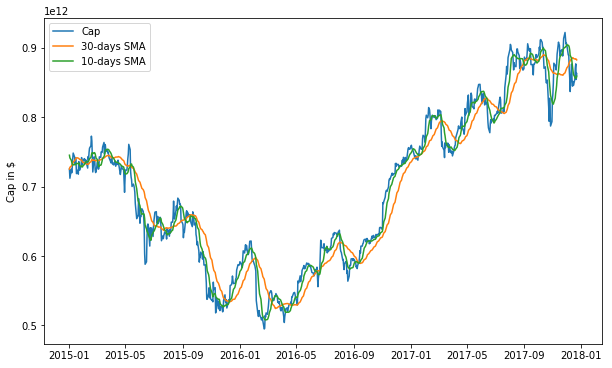

In [18]:
start_date = '2015-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'AAPL'], 
          label = '%d-days SMA' % window_2)
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'AAPL'], 
         label = '%d-days SMA' % window_1)

ax.legend(loc='best')
ax.set_ylabel('Cap in $')

plt.show()

## Part 1: Model calibration with or without moving average signals (Max 10 points)

To calibrate the model, it is convenient to use the log-prices instead of prices. Diffusion in the log-space 
$ y = \log x $ is given by the following Langevin equation:

$$
d y_t = - \frac{ \partial V(y)}{\partial y} dt + \sigma dW_t , \; \; \;  V(y)  \equiv - \left( \theta - \frac{\sigma^2}{2} + {\bf w} {\bf z}_t \right) y  + \kappa e^y + \frac{1}{2} g e^{2y}
$$

where $ W_t $ is a standard Brownian motion.
In terms of variables $ y = \log x $, the negative log-likelihood of data is therefore

$$
LL_M (\Theta) = - \log \prod_{t=0}^{T-1} 
\frac{1}{ \sqrt{ 2 \pi  \sigma^2}  } 
\exp \left\{  - \frac{1}{2 \sigma^2} \left(   \frac{ y_{t+ \Delta t} -   y_{t}}{ \Delta t} +  \frac{ \partial V(y)}{\partial y}   
\right)^2
\right\} , 
$$ 

where $ {\bf y}_t  = \log x_t $  now stands for observed values of log-cap. Note that because the model is Markov, the product over $ t = 0, \ldots, T-1 $ does not 
necessarily mean a product of transitions along the same trajectory. The negative log-likelihood should be minimized to estimate parameters $ 
\theta $, $ \sigma $, $ \kappa $, $ g $ and  $ {\bf w} $. You can try to estimate the model first without signals, then with signals.


In [19]:
# utility function  to reset the TF graph to the same state each time
def reset_graph(seed=42):
    # to make results reproducible across runs
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
# 30 stocks & 2080 days
df_cap.shape

(2080, 30)

In [69]:
# Put the rest of you code and analysis for Part I here 
class QED_MLE_Model:
    
    def __init__(self, ndim, learning_rate):
        # stock assets
        self.x = tf.placeholder(tf.float32, [None, ndim], name = 'x')
        self.y = tf.log(self.x) # dim 0 days dim 1 stocks
        # predictors
        self.z_1 = tf.placeholder(tf.float32, [None, ndim], name='z_1')
        self.z_2 = tf.placeholder(tf.float32, [None, ndim], name='z_2')
        
        # k mean reversion speed
        self.k = tf.Variable(tf.random_uniform([ndim], minval=0.,maxval=1), name='k') + 0.0001
        # variance of each assets(ndim)
        self.sigma = tf.Variable(tf.square(tf.random_uniform([ndim], minval=0., maxval=1))) + 0.0001
        self.theta = tf.Variable(tf.square(tf.random_uniform([ndim], minval=0., maxval=1))) + 0.0001
        self.g = tf.Variable(tf.random_uniform([ndim], minval=0.,maxval=1), name='k') + 0.0001
        
        self.w_1 = tf.random_normal([ndim], mean=0.5, stddev = 0.1)
        self.w_2 = tf.ones([ndim]) - self.w_1
        
        # mean of all stock assets delta is constant zero
        self.mu = tf.zeros([ndim])
        
        self.scale = tf.slice(self.y, [0,0], [1,-1])

        self.z = self.scale * tf.cumprod(1 + self.z_1*self.w_1 + self.z_2*self.w_2)
        
        self.v = - tf.multiply((self.theta - tf.square(self.theta)/2.0 + self.z), self.y) + \
                tf.multiply(self.k, tf.exp(self.y)) + \
                tf.multiply(self.g, tf.exp(self.y*2))/2.0
        
        # Multivariate Normal Distribution, no need to implement the MLE function
        self.mult_norm_dist = tf.contrib.distributions.MultivariateNormalDiag(loc=self.mu, scale_diag=self.sigma)
        # the log probability of v 
        self.log_prob = self.mult_norm_dist.log_prob(self.v)
        # tf.square(self.w_1+self.w_2-0.95) -> paper chapter 7 Experiments 
        self.loss = -tf.reduce_sum(self.log_prob)
        
        self.train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.loss)
        
        

In [73]:

def run_model(model, assets, sig_1, sig_2):

    reset_graph()

    model = model(assets.shape[1], 0.01)

    with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            for i in range(1100):
                _,loss  = sess.run([model.train_step, model.loss], 
                         feed_dict = {
                                model.x: assets,
                                model.z_1: sig_1,
                                model.z_2: sig_2} )
                
                if i%100 == 0:
                    print("loss", loss)
            
            

            theta, delta, k, g = sess.run([model.theta, model.sigma, model.k, model.g], feed_dict = { 
                model.x: assets, 
                
                model.z_1: sig_1, 
                model.z_2: sig_2}
                                  )
            
            print()
            print("theta:", theta)
            print("delta:", delta)
            print("k:", k)
            print("g:", g)
    
    return mean_levels

In [74]:
stock_assets = df_cap[window_2:] / df_cap.sum(axis=1).mean()
short_rolling_pct_chg = short_rolling.pct_change()[window_2:]
long_rolling_pct_chg = long_rolling.pct_change()[window_2:]

reset_graph()

mean_levels = run_model(QED_MLE_Model, stock_assets, short_rolling_pct_chg, long_rolling_pct_chg)

loss 182573120000000.0
loss 727991200.0
loss 697040640.0
loss 683100600.0
loss 671947600.0
loss 667412200.0
loss 663714560.0
loss 658315970.0
loss 654600900.0
loss 654437200.0
loss 650740030.0

theta: [0.999995   0.9999976  0.99812365 0.9999978  0.9999985  0.99999833
 0.99848914 0.99971706 0.9990651  0.99974763 1.         0.99999815
 0.999999   0.99957436 0.9991969  0.97185814 1.0000002  0.99828565
 0.99296236 0.94642043 0.959738   0.9999987  0.9720296  0.99979424
 0.5718796  0.9983212  0.9999983  0.9999473  0.99974924 0.9999745 ]
delta: [3.309517   1.7753448  1.490827   2.127008   3.7270079  2.972592
 1.4456012  0.51459074 2.334206   1.0505652  2.9060168  1.4698379
 2.9769585  2.1353028  2.620034   0.95785147 3.392444   2.4328341
 1.5330924  0.1816716  0.7251418  1.9699159  0.78586614 3.3798058
 0.06016935 0.50767636 2.9002986  3.4537618  3.476372   2.5041633 ]
k: [5.6854844  4.415414   4.513262   4.9351535  5.878345   4.7603393
 4.087988   2.4592676  5.096154   3.097801   4.758635   

## Part 2: Analysis of default rates  (Max 10 point)

For a particle in a potential $ V(y) $ with a metastable minimum $ y = a $ and a barrier with a peak located at $ y = b $, the famous Kramers' escape formula gives the following expression for the escape rate $ r $ (see e.g. the book by van Kampen):

$$ 
r = \frac{\sqrt{ V''(a) \left| V''(b) \right| }}{2 \pi} \exp \left[ - \frac{2}{\sigma^2} (V(b) - V(a) ) \right]
$$

Here $ V''(a) $ and $ V''(b) $ stand for the second derivatives of the potential $ V(y) $ at the minimum and the maximum, respectively. This formula applies as long as the barrier height $ \Delta E \equiv  (V(b) - V(a) \gg \frac{\sigma^2}{2} $. 

Apply the Kramers formula to the QED potential and parameters that you found in your calibration. What range of values of $ r $ do you obtain? Do these values make sense to you? Can you think how you could use the Kramers relation as a way to regularize your MLE calibration?


$$\lambda_1 \max(y_b-y_0,0)$$

In [82]:
# Put the rest of your code and analysis for Part 2 here.
class QED_MLE_Model_With_Reg:
    
    def __init__(self, ndim, learning_rate):
        # stock assets
        self.x = tf.placeholder(tf.float32, [None, ndim], name = 'x')
        self.y = tf.log(self.x) # dim 0 days dim 1 stocks
        # predictors
        self.z_1 = tf.placeholder(tf.float32, [None, ndim], name='z_1')
        self.z_2 = tf.placeholder(tf.float32, [None, ndim], name='z_2')
        
        # k mean reversion speed
        self.k = tf.Variable(tf.random_uniform([ndim], minval=0.,maxval=1), name='k') + 0.0001
        # variance of each assets(ndim)
        self.sigma = tf.Variable(tf.square(tf.random_uniform([ndim], minval=0., maxval=1))) + 0.0001
        self.theta = tf.Variable(tf.square(tf.random_uniform([ndim], minval=0., maxval=1))) + 0.0001
        self.g = tf.Variable(tf.random_uniform([ndim], minval=0.,maxval=1), name='k') + 0.0001
        
        self.w_1 = tf.random_normal([ndim], mean=0.5, stddev = 0.1)
        self.w_2 = tf.ones([ndim]) - self.w_1
        
        # mean of all stock assets delta is constant zero
        self.mu = tf.zeros([ndim])
        
        self.scale = tf.slice(self.y, [0,0], [1,-1])

        self.z = self.scale * tf.cumprod(1 + self.z_1*self.w_1 + self.z_2*self.w_2)
        
        self.v = - tf.multiply((self.theta - tf.square(self.theta)/2.0 + self.z), self.y) + \
                tf.multiply(self.k, tf.exp(self.y)) + \
                tf.multiply(self.g, tf.exp(self.y*2))/2.0
        
        # Multivariate Normal Distribution, no need to implement the MLE function
        self.mult_norm_dist = tf.contrib.distributions.MultivariateNormalDiag(loc=self.mu, scale_diag=self.sigma)
        # the log probability of v 
        self.log_prob = self.mult_norm_dist.log_prob(self.v)
        # tf.square(self.w_1+self.w_2-0.95) -> paper chapter 7 Experiments 
        self.loss = -tf.reduce_sum(self.log_prob) + tf.reduce_sum(0.001*tf.maximum(0.005-np.min(self.y), 0 ))
        
        self.train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.loss)

In [83]:
stock_assets = df_cap[window_2:] / df_cap.sum(axis=1).mean()
short_rolling_pct_chg = short_rolling.pct_change()[window_2:]
long_rolling_pct_chg = long_rolling.pct_change()[window_2:]

reset_graph()

mean_levels = run_model(QED_MLE_Model_With_Reg, stock_assets, short_rolling_pct_chg, long_rolling_pct_chg)

loss 182573120000000.0
loss 727991360.0
loss 697040830.0
loss 683100800.0
loss 671947800.0
loss 667412400.0
loss 663714750.0
loss 658316160.0
loss 654601100.0
loss 654437400.0
loss 650740200.0

theta: [0.999995   0.9999976  0.99812365 0.9999978  0.9999985  0.99999833
 0.99848914 0.99971706 0.9990651  0.99974763 1.         0.99999815
 0.999999   0.99957436 0.9991969  0.97185814 1.0000002  0.99828565
 0.99296236 0.94642043 0.959738   0.9999987  0.9720296  0.99979424
 0.5718796  0.9983212  0.9999983  0.9999473  0.99974924 0.9999745 ]
delta: [3.309517   1.7753448  1.490827   2.127008   3.7270079  2.972592
 1.4456012  0.51459074 2.334206   1.0505652  2.9060168  1.4698379
 2.9769585  2.1353028  2.620034   0.95785147 3.392444   2.4328341
 1.5330924  0.1816716  0.7251418  1.9699159  0.78586614 3.3798058
 0.06016935 0.50767636 2.9002986  3.4537618  3.476372   2.5041633 ]
k: [5.6854844  4.415414   4.513262   4.9351535  5.878345   4.7603393
 4.087988   2.4592676  5.096154   3.097801   4.758635   

## Part 3: Propose and analyse your own signals  (Max 10 points)

In this part, you will experiment with other signals. Propose a signal and explain why it is interesting to 
include this signal in the portfolio analysis. Then add your favorite signal or signals to the previous benchmarck signals (or alternatively you can replace them), and repeat the analysis of model calibration. State your conclusions.


In [84]:
# Put the rest of your code and analysis for Part 3 here.
# Put the rest of your code and analysis for Part 2 here.
stock_assets = df_cap[window_2:] / df_cap.sum(axis=1).mean()
short_ema = df_cap.ewm(window_1).mean()
long_ema = df_cap.ewm(window_2).mean()
short_ema_pct_change = short_ema.pct_change()[window_2:]
long_ema_pct_change = long_ema.pct_change()[window_2:]

reset_graph()

In [85]:
mean_levels = run_model(QED_MLE_Model_With_Reg, stock_assets, short_ema_pct_change, long_ema_pct_change)

loss 178187760000000.0
loss 708432800.0
loss 678417400.0
loss 665999500.0
loss 654074430.0
loss 650760200.0
loss 647156900.0
loss 640599360.0
loss 636509250.0
loss 637568640.0
loss 632901760.0

theta: [0.999995   0.9999976  0.9981251  0.9999978  0.9999985  0.99999833
 0.9984888  0.9997176  0.99906605 0.99974793 1.         0.99999815
 0.999999   0.9995743  0.99919677 0.9718497  1.0000002  0.9982855
 0.9929596  0.9463958  0.9597439  0.9999987  0.972032   0.9997943
 0.57187843 0.99832124 0.9999983  0.9999473  0.99974954 0.99997455]
delta: [3.3083217  1.7749254  1.4902204  2.1270297  3.7260587  2.9719894
 1.4455361  0.5147332  2.3337493  1.0506996  2.9052808  1.4699283
 2.9765904  2.134781   2.617355   0.95771897 3.3923216  2.432303
 1.5317701  0.18169905 0.7247302  1.9696428  0.7858456  3.379148
 0.06016934 0.5075528  2.9001231  3.4534073  3.4754407  2.5042193 ]
k: [5.6856375  4.415317   4.5133963  4.9353085  5.8789077  4.7603545
 4.087988   2.4591434  5.0962973  3.0979059  4.7587056  3.5

## Part 4 (Optional): Show me something else (Max 10 points).

Here you can develop any additional analysis of the model that you may find interesting (One possible suggestion is 
presented above, but you should feel free to choose your own topic). Present your case and finding/conclusions.


In [10]:
# Put the rest of your code and analysis for Part 3 here.

In [105]:
# show pca 
import datetime
asset_returns = df_cap.pct_change(axis='rows').dropna()

normed_returns = (asset_returns - asset_returns.mean())/asset_returns.std()


normed_returns.columns

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GE', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'],
      dtype='object')

In [91]:
train_end = datetime.datetime(2015, 1, 1) 

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

In [96]:
import sklearn.decomposition
import seaborn as sns

stock_tickers = normed_returns.columns

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns

    cov_matrix = df_train[stock_tickers].cov()
    cov_matrix_raw = df_raw_train[stock_tickers].cov()
    
    pca = sklearn.decomposition.PCA().fit(cov_matrix)
   
   
    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)    
    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

11 components explain 80.00% of variance


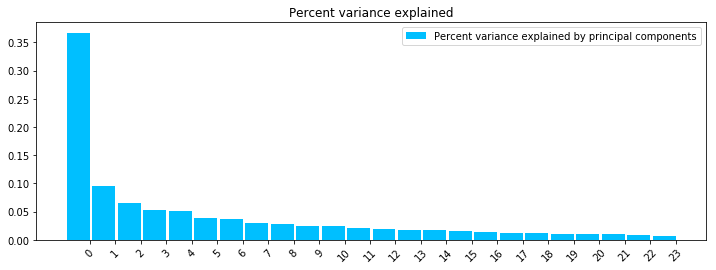

In [99]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((8 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

if pca is not None:
    projected = pca.fit_transform(cov_matrix)

Sum of weights of first eigen-portfolio: 100.00


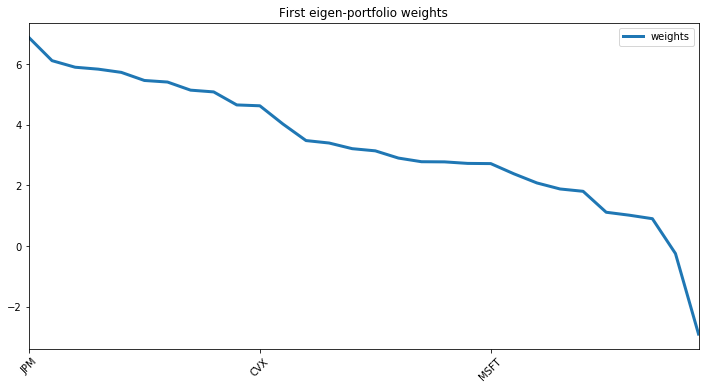

In [107]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    best_weight_total = pcs[0,:].sum()
    # normalized to 1 
    pc_w = pcs[0,:]/best_weight_total
    
    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights', 
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

In [108]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio, 
                    where sharpe ratio is defined as annualized return divided by annualized volatility 
                    
    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio
    
    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.

    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std()*np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return/annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

First eigen-portfolio:
Return = 8.37%
Volatility = 14.21%
Sharpe = 0.59


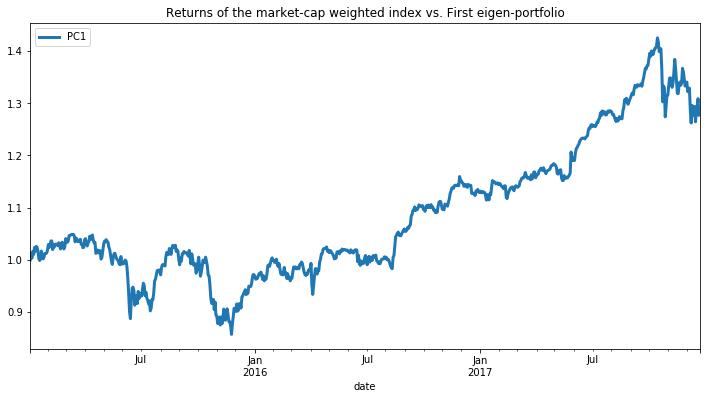

In [109]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)